In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-airline-flight-routes-and-fares-1993-2024/US Airline Flight Routes and Fares 1993-2024.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('/kaggle/input/us-airline-flight-routes-and-fares-1993-2024/US Airline Flight Routes and Fares 1993-2024.csv')
df

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,Table1a,2024,1,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12953,TYS,...,278.70,DL,0.7503,287.44,AA,0.2359,248.46,NaN,NaN,202411541212953TYSLGA
245951,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,11697,TYS,...,148.69,G4,0.8255,114.45,G4,0.8255,114.45,NaN,NaN,202411541211697TYSFLL
245952,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,13303,TYS,...,330.19,AA,0.8057,321.92,AA,0.8057,321.92,NaN,NaN,202411541213303TYSMIA
245953,Table1a,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,14112,TYS,...,95.65,G4,1.0000,95.65,G4,1.0000,95.65,NaN,NaN,202411541214112TYSPIE


In [4]:
df.iloc[:,:15]

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,PIE,970,180,81.43,G4
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,TPA,970,19,208.93,DL
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,DAL,580,204,184.56,WN
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,DFW,580,264,182.64,AA
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,PHX,328,398,177.11,WN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,Table1a,2024,1,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12953,TYS,LGA,665,207,278.70,DL
245951,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,11697,TYS,FLL,724,277,148.69,G4
245952,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,13303,TYS,MIA,724,70,330.19,AA
245953,Table1a,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,14112,TYS,PIE,550,178,95.65,G4


In [5]:
df.dtypes

tbl                object
Year                int64
quarter             int64
citymarketid_1      int64
citymarketid_2      int64
city1              object
city2              object
airportid_1         int64
airportid_2         int64
airport_1          object
airport_2          object
nsmiles             int64
passengers          int64
fare              float64
carrier_lg         object
large_ms          float64
fare_lg           float64
carrier_low        object
lf_ms             float64
fare_low          float64
Geocoded_City1     object
Geocoded_City2     object
tbl1apk            object
dtype: object

In [6]:
df.isnull().mean()*100

tbl                0.000000
Year               0.000000
quarter            0.000000
citymarketid_1     0.000000
citymarketid_2     0.000000
city1              0.000000
city2              0.000000
airportid_1        0.000000
airportid_2        0.000000
airport_1          0.000000
airport_2          0.000000
nsmiles            0.000000
passengers         0.000000
fare               0.000000
carrier_lg         0.626131
large_ms           0.626131
fare_lg            0.626131
carrier_low        0.655404
lf_ms              0.655404
fare_low           0.655404
Geocoded_City1    15.940314
Geocoded_City2    15.940314
tbl1apk            0.000000
dtype: float64

In [7]:
df.describe()

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,244415.000000,244415.000000,244343.000000,244343.000000
mean,2008.524124,2.479153,31556.430201,32180.117086,12437.099986,13249.889525,1189.812319,299.476795,218.979587,0.665252,218.710963,0.450438,190.675939
std,8.703364,1.122149,1089.872880,1232.464184,1431.665257,1425.810159,703.143472,511.389486,82.372486,0.224635,84.674363,0.332669,73.577694
min,1993.000000,1.000000,30135.000000,30189.000000,10135.000000,10466.000000,109.000000,0.000000,50.000000,0.003800,50.000000,0.010000,50.000000
25%,2001.000000,1.000000,30721.000000,30994.000000,11193.000000,12197.000000,626.000000,21.000000,164.620000,0.480000,161.500000,0.158000,140.060000
50%,2008.000000,2.000000,31423.000000,32211.000000,12266.000000,13303.000000,1023.000000,113.000000,209.320000,0.652400,208.030000,0.360000,181.630000
75%,2016.000000,3.000000,32467.000000,33192.000000,13487.000000,14679.000000,1736.000000,339.000000,262.890000,0.871900,263.640000,0.750000,230.040000
max,2024.000000,4.000000,35412.000000,35628.000000,16440.000000,15919.000000,2724.000000,8301.000000,3377.000000,1.000000,2725.600000,1.000000,2725.600000


In [8]:
df.corr(numeric_only=True)

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
Year,1.000000,0.006125,-0.000373,-0.007119,-0.009018,-0.016622,0.018843,0.086214,0.151058,0.105231,0.154496,0.102918,0.174297
quarter,0.006125,1.000000,0.000384,0.003282,0.000650,0.000613,0.000205,0.016498,-0.026186,-0.000968,-0.024517,-0.000426,-0.015940
citymarketid_1,-0.000373,0.000384,1.000000,0.007237,0.526658,0.061771,0.104284,-0.043699,0.044420,-0.119061,0.036973,-0.056508,0.033375
citymarketid_2,-0.007119,0.003282,0.007237,1.000000,0.043398,0.537673,0.091133,-0.090974,0.014113,-0.024305,0.009706,0.021699,0.029288
airportid_1,-0.009018,0.000650,0.526658,0.043398,1.000000,0.067267,0.090738,-0.015663,0.035840,-0.104327,0.026997,-0.036139,0.038183
airportid_2,-0.016622,0.000613,0.061771,0.537673,0.067267,1.000000,0.182279,-0.017792,0.053326,-0.084999,0.046269,-0.021996,0.056120
nsmiles,0.018843,0.000205,0.104284,0.091133,0.090738,0.182279,1.000000,-0.079008,0.500407,-0.400557,0.483488,-0.252953,0.416711
passengers,0.086214,0.016498,-0.043699,-0.090974,-0.015663,-0.017792,-0.079008,1.000000,-0.171460,-0.077901,-0.126955,-0.123004,-0.205293
fare,0.151058,-0.026186,0.044420,0.014113,0.035840,0.053326,0.500407,-0.171460,1.000000,-0.182312,0.955984,-0.188844,0.874653
large_ms,0.105231,-0.000968,-0.119061,-0.024305,-0.104327,-0.084999,-0.400557,-0.077901,-0.182312,1.000000,-0.178428,0.532854,-0.082080


<Axes: >

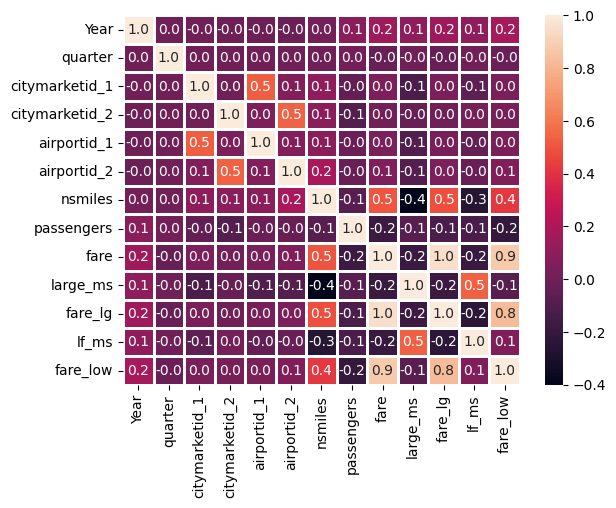

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.1f',linewidth=2,square=False)

In [10]:
ct = pd.crosstab(df['fare'],df['nsmiles'])
pvalue = chi2_contingency(ct)
print(ct)
print(pvalue)

NameError: name 'chi2_contingency' is not defined

In [ ]:
df = df.rename(columns={'tbl':'Table_ID','citymarketid_1':'Origin_City_ID','citymarketid_2':'Destination_City_ID','city1':'Origin_City','city2':'Destination_City','airportid_1':'Origin_Airport_ID','airportid_2':'Destination_Airport_ID','airport_1':'Origin_Airport_Code','lf_ms':'LowestCarrier_MarketShare','airport_2':'Destination_Airport_Code','nsmiles':'Distance_Btwn_Airport_Miles','carrier_lg':'Code_for_largest_carrier','fare_lg':'largest_carrier_average_fare','tbl1apk':'Route_ID'})

In [ ]:
def extract_OriginCity(origincity):
    if pd.isna(origincity):
        return 'NA'
    parts = origincity.split(',')
    if len(parts)>0:
        return parts [-2].strip()
    else:
        return 'NA'
df['OriginCity'] = df['Origin_City'].apply(extract_OriginCity)
OriginCity_value_counts = df['OriginCity'].value_counts()
print(OriginCity_value_counts)

In [ ]:
def extract_OriginState(originstate):
    if pd.isna(originstate):
        return 'NA'
    parts = originstate.split(',')
    if len(parts)>0:
        
        return parts [-1].strip()
    else:
        return 'NA'
df['OriginState'] = df['Origin_City'].apply(extract_OriginState)
DestinationState_value_counts = df['OriginState'].value_counts()
print(DestinationState_value_counts)

In [ ]:
def extract_DestinationCity(destinationcity):
    if pd.isna(destinationcity):
        return 'NA'
    parts = destinationcity.split(',')
    if len(parts)>0:
        return parts [-2].strip()
        
    else:
        return 'NA'
df['DestinationCity'] = df['Destination_City'].apply(extract_DestinationCity)
DestinationCity_value_counts = df['DestinationCity'].value_counts()
print(DestinationCity_value_counts)

In [ ]:
def extract_DestinationState(destinationstate):
    if pd.isna(destinationstate):
        return 'NA'
    parts = destinationstate.split(',')
    if len(parts)>0:
        return parts [-1].strip()
    else:
        return 'NA'
df['DestinationState'] = df['Destination_City'].apply(extract_DestinationState)
DestinationState_value_counts = df['DestinationState'].value_counts()
print(DestinationState_value_counts)

In [ ]:
df = df.drop(columns=['Origin_City','Destination_City','Route_ID','Table_ID'],axis=1)

In [ ]:
df.dtypes

In [ ]:
X = df[['Year','quarter','Distance_Btwn_Airport_Miles','fare_low','fare','LowestCarrier_MarketShare','largest_carrier_average_fare','large_ms','passengers']]

In [ ]:
cols = X.columns
for columns in cols:
    fig, axs = plt.subplots(figsize=(2,2))
    sns.histplot(X[columns])

In [ ]:
cols = X.columns
for columns in cols:
    fig, axs = plt.subplots(figsize=(2,2))
    sns.kdeplot(X[columns])

In [ ]:
cols = X.columns
for columns in cols:
    fig, axs = plt.subplots(figsize=(2,2))
    sns.boxplot(X[columns])

In [ ]:
Top_Destination_City = df['DestinationCity'].value_counts().head(20)
Top_Destination_City.plot(kind='bar')

In [ ]:
Top_Destination_State = df['DestinationState'].value_counts().head(20)
Top_Destination_State.plot(kind='bar')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df,y='fare',x='Distance_Btwn_Airport_Miles')
plt.show()

In [ ]:
sns.barplot(data=df,x='Year',y='fare')
plt.show()

In [ ]:
df.columns

In [ ]:
Group = df.groupby('OriginCity')

In [ ]:
df.groupby('OriginCity').sum()['fare'].sort_values(ascending=False)

In [ ]:
Top_cities_heighest_fare = df.groupby('OriginCity')['fare'].sum().nlargest(20).reset_index()
Top_cities_heighest_fare

In [ ]:
sns.barplot(data=Top_cities_heighest_fare, x='OriginCity',y='fare', palette='viridis')
plt.title('Heigest fare in Origin City',fontsize=12)
plt.xlabel('Origin Cities',fontsize=12)
plt.ylabel('Fare',fontsize=12)
plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
df.groupby('OriginCity').sum()['passengers'].sort_values(ascending=False)

In [ ]:
df.groupby('Origin_Airport_Code').sum()['passengers'].nlargest(20).sort_values(ascending=False).plot(kind='pie',subplots=True)

In [ ]:
Top_busiest_airport_passengers = df.groupby('Origin_Airport_Code')['passengers'].sum().nlargest(20).reset_index()
Top_busiest_airport_passengers

In [ ]:
sns.barplot(data=Top_busiest_airport_passengers, x='Origin_Airport_Code',y='passengers', palette='viridis')
plt.title('Heigest Numbers Of Passengers in Origin City Airport/Busiest Airport',fontsize=12)
plt.xlabel('Origin Airport',fontsize=12)
plt.ylabel('Passengers',fontsize=12)
plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
heighest_fare_according_years = df.groupby('Year')['fare'].sum().nlargest(20).reset_index()
heighest_fare_according_years

In [ ]:
sns.barplot(data=heighest_fare_according_years, x='Year',y='fare', palette='viridis')
plt.title('Heighest Fare Rate According Pass Yeras',fontsize=12)
plt.xlabel('Yeras Cities',fontsize=12)
plt.ylabel('Fare',fontsize=12)
plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
sns.lineplot(data=heighest_fare_according_years, x='Year',y='fare', palette='viridis')
plt.title('Heighest Fare Rate According Pass Yeras',fontsize=12)
plt.xlabel('Yeras Cities',fontsize=12)
plt.ylabel('Fare',fontsize=12)
plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
#CORRELATION BETWEEN FARE AND MILES BETWEEN ORIGIN AND DESTINATION CITIES
correlation = df['fare'].corr(df['Distance_Btwn_Airport_Miles'])
print(f'correlation between fare and miles: {correlation:.2f}')

In [ ]:
df.columns

In [ ]:
import plotly.express as px
highest_fare = df.sort_values(by=['Year','fare'],ascending=False)
highest_fare = highest_fare.head(9)
print(highest_fare['DestinationCity'])

In [ ]:
Group = df.groupby('DestinationCity')

In [ ]:
Average_fare = df.groupby(['OriginCity' , 'DestinationCity'])['fare'].mean().nlargest(20).reset_index()
Average_fare

In [ ]:
df.columns

In [ ]:
df['fare'].max()

In [ ]:
data_2024 = df[(df['Year']==2024)]

In [ ]:
s = Group1.get_group('New York City')[['OriginCity','fare']]
s

In [ ]:
Average_fare_2024 = data_2024.groupby(['OriginCity' , 'DestinationCity'])['fare'].mean().nlargest(20).reset_index()
Average_fare

In [ ]:
fig, ax = plt.subplots()
ax.pie(Average_fare,radius=1,labels=Average_fare.index,autopct='%1.f%%',wedgeprops=dict(width=0.5,edgecolor='w'))
ax.pie(df['Years'],labels=df['Year'].index,radius=1-0.5,autopct='%1.f%%',wedgeprops=dict(width=0.5,edgecolor='w'))
ax.set_title('Fare Prediction')
plt.tight_layout()
plt.show()

In [ ]:
fig = px.sunburst(Average_fare,path=['DestinationCity','OriginCity'],values='fare')
fig.update_traces(textinfo='label + percent parent')
fig.show()

In [ ]:
#MarketShare During The Years
Market_share = df.groupby('Year').sum()['large_ms'].sort_values(ascending=False)
Market_share

In [ ]:
#MarketShare During The Years
Market_share = df.groupby('Year')['large_ms'].sum().nlargest(40).reset_index()
Market_share

In [ ]:
Market_share.plot(kind='bar')

In [ ]:
Market_share.plot(kind='pie',subplots=True)

In [ ]:
#Which Airports has heighest Numbers Of Routes
Top_Airport_Origin = df['Origin_Airport_Code'].value_counts().head(20)

In [ ]:
Most_Origin_Airport_Routes = df['Origin_Airport_Code'].value_counts().head(30)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=Most_Origin_Airport_Routes.values,y=Most_Origin_Airport_Routes.index)
plt.show()

In [ ]:
Cities_With_Highest_Fares = df.groupby(['OriginCity','DestinationCity'])['fare'].sum().sort_values(ascending=False)
Cities_With_Highest_Fares

In [ ]:
df.plot('Year',['large_ms','LowestCarrier_MarketShare'],secondary_y='fare')

In [ ]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

df.plot(x='large_ms',y=['Year'],ax=ax)
df.plot(x='LowestCarrier_MarketShare',y=['Year'],ax=ax2)
fig.legend(loc='upper right',bbox_to_anchor=(1,1),bbox_transform=ax.transAxes)
plt.show()

In [ ]:
df_melted = df.melt(id_vars='Year',value_vars=['large_ms','LowestCarrier_MarketShare'],var_name='Market Share Type',value_name='Market Share')
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted,x='Year',y='Market Share',hue='Market Share Type',marker='o')
plt.title('Market Share Lowest/Higher')
plt.tight_layout()
plt.show()

In [ ]:
df1_melted = df.melt(id_vars='Year',value_vars=['largest_carrier_average_fare','fare_low'],var_name='Fare Type',value_name='Flight Fare')
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1_melted,x='Year',y='Flight Fare',hue='Fare Type',marker='o')
plt.title('Flight Lowest/Higher Fare Over Time Period')
plt.tight_layout()
plt.show()

In [ ]:
df.columns

In [ ]:
df['DestinationCity'].value_counts().tail(75)

In [ ]:
df_new = df[['Year','quarter','Origin_City_ID','passengers','fare','large_ms','OriginCity','OriginState','Origin_Airport_Code']]

In [ ]:
import plotly.express as go
df_new['Year'] = pd.to_datetime(df_new['Year'])
df_new['Year'] = df_new['Year'].dt.year
df_new = df.sort_values(by=['Year'])
df_new

In [ ]:
df= df[df['Year']>1994]
DepartureCity = df[['OriginCity','Origin_Airport_Code']]
DepartureCity

In [ ]:
df_final = pd.merge(df_new,DepartureCity,left_on='Origin_City_ID',right_on='Origin_Airport_Code',how='left')
df_final = df_final.iloc[:,:-1]
df_final

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('fare',axis=1),df['fare'],test_size=0.2,random_state=42)

In [ ]:
df.dtypes

In [ ]:
USAirline_Fares = df[['Year','quarter','OriginCity','DestinationCity','Origin_Airport_ID','Destination_Airport_ID','Distance_Btwn_Airport_Miles','passengers','fare','large_ms','largest_carrier_average_fare']]
USAirline_Fares

In [ ]:
USAirline_Fares.isnull().mean()*100

In [ ]:
USAirline_Fares.dtypes

In [ ]:
pd.__version__

In [ ]:
import numpy
numpy.version.version

In [ ]:
import sklearn
print('The Scikit-learn version is {},'.format(sklearn.__version__))

In [ ]:
!python --version

In [ ]:
USAirline_Fares['OriginCity'].value_counts(20)

In [ ]:
USAirline_Fares['largest_carrier_average_fare'].mean()

In [ ]:
USAirline_Fares['large_ms'] = USAirline_Fares['large_ms'].fillna(0.66525163)

In [ ]:
USAirline_Fares['largest_carrier_average_fare'] = USAirline_Fares['largest_carrier_average_fare'].fillna(218.71096)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(USAirline_Fares.drop('fare',axis=1),USAirline_Fares['fare'],test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder(drop='first',sparse_output=False)
X_train_OHE = oe.fit_transform(X_train[['OriginCity','DestinationCity']])
X_test_OHE = oe.transform(X_test[['OriginCity','DestinationCity']])

In [ ]:
X_train_RD = X_train.drop(columns=['OriginCity','DestinationCity']).values
X_test_Rd = X_test.drop(columns=['OriginCity','DestinationCity']).values

In [ ]:
X_train_new = np.concatenate((X_train_OHE,X_train_RD),axis=1)
X_test_new = np.concatenate((X_test_OHE,X_test_Rd),axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_new,y_train)

In [ ]:
y_pred = lr.predict(X_test_new)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math
from math import sqrt

In [ ]:
print('MSE',mean_squared_error(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MASE',sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score',r2_score(y_test,y_pred))

In [ ]:
r2 = r2_score(y_test,y_pred)
r2

In [ ]:
n = X_test.shape[0]
p = X_test.shape[1]

In [ ]:
R2 = 1-((1-r2)*(n-1)/(n-1-p))
R2

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()
sns.regplot(x=y_test,y=y_pred,ci=68,fit_reg=True,scatter_kws={'color':'red'},line_kws={'color':'blue'})
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(criterion='squared_error',max_depth=8)
DT.fit(X_train_new,y_train)

In [ ]:
y_pred1 = DT.predict(X_test_new)

In [ ]:
r2_score(y_test,y_pred1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=20,criterion='squared_error',max_depth=8)
rfr.fit(X_train_new,y_train)

In [ ]:
y_pred2 = rfr.predict(X_test_new)

In [ ]:
r2_score(y_test,y_pred2)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor(loss='squared_error',criterion='squared_error',n_estimators=20,max_depth=8)
GB.fit(X_train_new,y_train)


In [ ]:
y_pred3 = GB.predict(X_test_new)

In [ ]:
r2_score(y_test,y_pred3)

In [ ]:
import xgboost as xg
XG = XGBoostRegressor()


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
trf1 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse_output=False,drop='first'),['OriginCity','DestinationCity'])
],remainder='passthrough')
Random = RandomForestRegressor(criterion='squared_error',n_estimators=20,max_depth=8)
London_AirlineFarePipeline = Pipeline(steps=[
    ('trf1',trf1),
    ('Random',Random)
])

In [ ]:
London_AirlineFarePipeline

In [ ]:
London_AirlineFarePipeline.fit(X_train,y_train)

In [ ]:
predictions = London_AirlineFarePipeline.predict(X_test)

In [ ]:
r2_score(y_test,predictions)

In [ ]:
import pickle
pickle.dump(London_AirlineFarePipeline,open('London_AirlineFarePipeline.pkl','wb'))
pickle.dump(USAirline_Fares,open('USAirline_Fares.pkl','wb'))

In [ ]:
from IPython.display import FileLink
FileLink('London_AirlineFarePipeline.pkl')

In [ ]:
FileLink('USAirline_Fares.pkl')

In [ ]:
pip install plotly

In [ ]:
pip install "notebook>=5.3" "ipywidgets">=7.5

In [ ]:
import plotly.offline as pyo
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objects as go
from plotly.graph_objs import scatter
pyo.init_notebook_mode()

In [ ]:
import plotly.io as pio
pio.renderers.default = 'iframe'


In [ ]:
df['Year'] = pd.to_datetime(df['Year'])
df['Year'] = df['Year'].dt.year

In [ ]:
figure = px.scatter(data_frame=df,x='Destination_City_ID',y='fare',size='Year')
figure.show()

In [ ]:
id_vars=['Year']
id_vars

In [ ]:
df['Year'].value_counts()

In [ ]:
years

In [ ]:
df = df[['Year','DestinationCity','OriginCity','fare']]
df

In [ ]:
df['Year'] = df['Year'].astype(str)

In [ ]:
indices= ['DestinationCity','OriginCity','fare']
df1 = pd.melt(df,id_vars=['Year'],value_vars=indices)
df1.columns = ['Year','index_symbol','value']
years = df.Year.unique().tolist()
titles =[]
xaxis_titles = []

for year in years:
    df_year = df1[df1['Year']==year]
    if titles:
        fig_temp = px.histogram(df_year,x="value",color = "index_symbol")
        fig.add_traces(fig_temp.data)
    else:
        fig = px.histogram(df_year,x="value",color="index_symbol")
        
    titles +=[year]
    xaxis_titles += ['']

print(len(fig.data))

def get_visible(idx):
    visibles = [False] * len(fig.data)
    for vis_idx in range(idx*len(indices),idx*len(indices)+len(indices)):
        visibles[vis_idx] = True
    return visibles
    
fig.update_traces(dict(visible=False))
for vis_idx in range(0, len(indices)):
    fig.data[vis_idx].visible=True

buttons = [ dict(label=titles[idx],method="update",args=[{"visible":get_visible(idx)},{"title":titles[idx],"xaxis":{"title":xaxis_titles[idx]}}]) for idx,data in enumerate(years)]

fig.update_layout(
    updatemenus=[

        dict(
            active=0,
            buttons = list(buttons),
        )
        
    ])
fig.update_layout(title_text=titles[0],xaxis=dict(title=xaxis_titles[0]))

In [ ]:
data = df.groupby(['Year','DestinationCity','fare'])['OriginCity'].size().to_frame(name='OriginCity').reset_index()
fig = go.Figure()
fig.add_trace(go.Histogram(x=df.fare,
                           y=df.passengers,
                           #colorscale=df.Year,
                           visible=True)
             )
updatemenu = []
buttons = []
buttons1 = []

for col,col1 in zip(list(df.Year.unique()),list(df.DestinationCity.unique())):
    buttons.append(dict(method='restyle',
                       label = col,
                       visible=True,
                           args=[{'y':[df[(df.Year==col)]['fare']],
                                  'x':[df[(df.Year==col)].OriginCity],
                              'type':'histrogram'}
                             
                               ],
                       )
                  )
    buttons1.append(dict(method='restyle',
                       label = col1,
                       visible=True,
                           args=[{'y':[df[(df.DestinationCity==col1)]['fare']],
                                  'x':[df[(df.DestinationCity==col1)].OriginCity],
                              'type':'histogram'}
                            
                                ],
                       )
                   )
updatemenu = []
your_menu = dict()
updatemenu.append(your_menu)
updatemenu.append(dict())
updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True
updatemenu[0]['x'] = 0.1
updatemenu[1]['buttons'] = buttons1
updatemenu[1]['direction'] = 'down'
updatemenu[1]['showactive'] = True
updatemenu[1]['x'] = 0.5

fig.update_layout(showlegend=False,updatemenus=updatemenu)
fig.show()



In [ ]:

df['Year'] = df['Year'].astype('str')

In [ ]:
data = df.groupby(['Year','OriginCity','DestinationCity','fare'])['large_ms'].size().to_frame(name='passengers').reset_index()
fig = go.Figure()
fig.add_trace(go.Histogram(x=df.Year,
                           y=df.fare,
                           #colorscale=df.Year,
                           visible=True)
             )
updatemenu = []
buttons = []
buttons1 = []
buttons2 = []

for col,col1 in zip(list(df.OriginCity.unique()),list(df.DestinationCity.unique())):
    buttons.append(dict(method='restyle',
                       label = col,
                       visible=True,
                           args=[{'y':[df[(df.OriginCity==col)]['fare']],
                                  'x':[df[(df.OriginCity==col)].Year],
                              'type':'histogram'}
                             
                               ],
                       )
                  )
    buttons1.append(dict(method='restyle',
                       label = col1,
                       visible=True,
                           args=[{'y':[df[(df.DestinationCity==col1)]['fare']],
                                  'x':[df[(df.DestinationCity==col1)].Year],
                              'type':'histogram'}
                            
                                ],
                       )
                   )

updatemenu = []
your_menu = dict()
updatemenu.append(your_menu)
updatemenu.append(dict())
updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True
updatemenu[0]['x'] = 0
updatemenu[1]['buttons'] = buttons1
updatemenu[1]['direction'] = 'down'
updatemenu[1]['showactive'] = True
updatemenu[1]['x'] = 1
fig.update_layout(showlegend=True,updatemenus=updatemenu)
fig.show()



In [ ]:
%matplotlib inline
df['Year'] = pd.to_datetime(df['Year'])
df['Year'] = df['Year'].dt.year

In [ ]:
fig = px.scatter(df,x='Destination_City_ID',y='fare',animation_frame='Year',animation_group='Origin_City_ID',size='passengers',color='large_ms',hover_name='Origin_City_ID',log_x=True,size_max=105,range_x=[200,150000],range_y=[10,200])
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 700
fig.show()

In [ ]:
pip install numpy scipy matplotlib ipython jupyter pandas sympy nose

In [ ]:
%matplotlib notebook

In [ ]:
df.columns

In [ ]:
fig = px.sunburst(df,path=['Year','fare'],values='large_ms')
fig.update_traces(textinfo='label+percent parent')
fig.show()